# Decision trees

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading the dataset
dataset = pd.read_csv("californian_housing.csv", index_col=0)
display(dataset.head())
display(dataset.shape)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,Très Chère
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,Très Chère
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,Très Chère
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,Très Chère
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,Très Chère


(20640, 9)

# 1. Exploration of the data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.6+ MB


> No missing values. Apparently no data cleaning to do.

In [ ]:
dataset.isnull().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
Price         False
dtype: bool

In [ ]:
dataset.describe(include ='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moyennement chère
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8289
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,NaN
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,NaN
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,NaN
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,NaN
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,NaN
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,NaN


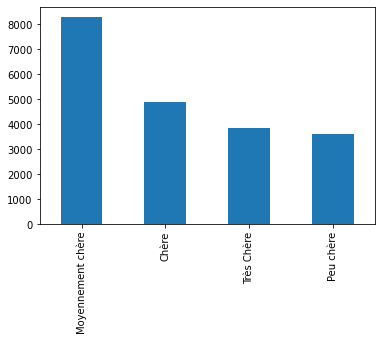

In [ ]:
# Possible values of prices
dataset["Price"].value_counts().plot.bar()

# 3. Preparing the data

## Creating target variable ('Price') and predictors.

In [ ]:
# Separation of X & y 
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [ ]:
# The target variable
y.head()

0    Très Chère
1    Très Chère
2    Très Chère
3    Très Chère
4    Très Chère
Name: Price, dtype: object

## Categorization of the target variable

In [ ]:
# Categorization y 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
label_encoder.classes_

array(['Chère', 'Moyennement chère', 'Peu chère', 'Très Chère'],
      dtype=object)

In [ ]:
# Visualisation 
y

array([3, 3, 3, ..., 2, 2, 2])

## Train / test split

In [ ]:
dataset.shape

(20640, 9)

In [ ]:
# Train_test_split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print("Nb rows X_train = {}".format(len(X_train)))
print("Nb rows X_test = {}".format(len(X_test)))
print("Nb rows y_train = {}".format(len(y_train)))
print("Nb rows y_test = {}".format(len(y_test)))

Nb rows X_train = 16512
Nb rows X_test = 4128
Nb rows y_train = 16512
Nb rows y_test = 4128


# 4. Predictive modelling

## Modeling with a decision tree

In [ ]:
# Creating a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# min_samples_leaf=50 allows to have more elements in the leaves, so less nodes and the tree is shallower.
classifier = DecisionTreeClassifier(min_samples_leaf=50)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50)

>  The min_samples_leaf parameter gives the minimum number of samples in a leaf node.  
They allow to put constraints on the construction of the tree.  
=> Indirectly control the overlearning phenomenon.

[Text(207.49888094973312, 210.192, 'X[0] <= 4.896\ngini = 0.718\nsamples = 16512\nvalue = [3914, 6616, 2875, 3107]'),
 Text(111.80866047597866, 195.696, 'X[0] <= 2.767\ngini = 0.666\nsamples = 12708\nvalue = [2563, 6152, 2864, 1129]'),
 Text(56.24059163701068, 181.2, 'X[6] <= 34.475\ngini = 0.604\nsamples = 5046\nvalue = [444, 2268, 2174, 160]'),
 Text(30.903469750889684, 166.704, 'X[7] <= -117.375\ngini = 0.573\nsamples = 2430\nvalue = [290, 1439, 598, 103]'),
 Text(20.701601423487546, 152.208, 'X[7] <= -118.225\ngini = 0.517\nsamples = 1660\nvalue = [250, 1102, 213, 95]'),
 Text(12.808185053380784, 137.712, 'X[6] <= 34.045\ngini = 0.637\nsamples = 922\nvalue = [193, 490, 157, 82]'),
 Text(6.553024911032029, 123.216, 'X[7] <= -118.285\ngini = 0.557\nsamples = 551\nvalue = [44, 331, 149, 27]'),
 Text(2.3829181494661924, 108.72, 'X[7] <= -118.355\ngini = 0.469\nsamples = 263\nvalue = [36, 186, 19, 22]'),
 Text(1.1914590747330962, 94.22399999999999, 'gini = 0.666\nsamples = 57\nvalue = [

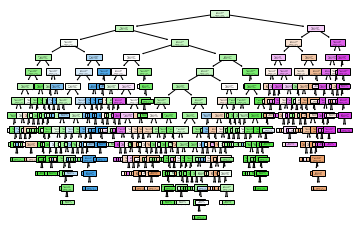

In [ ]:
# visualizing the tree
from sklearn import tree
tree.plot_tree(classifier, filled=True)

In [ ]:
X.columns
y

array([3, 3, 3, ..., 2, 2, 2])

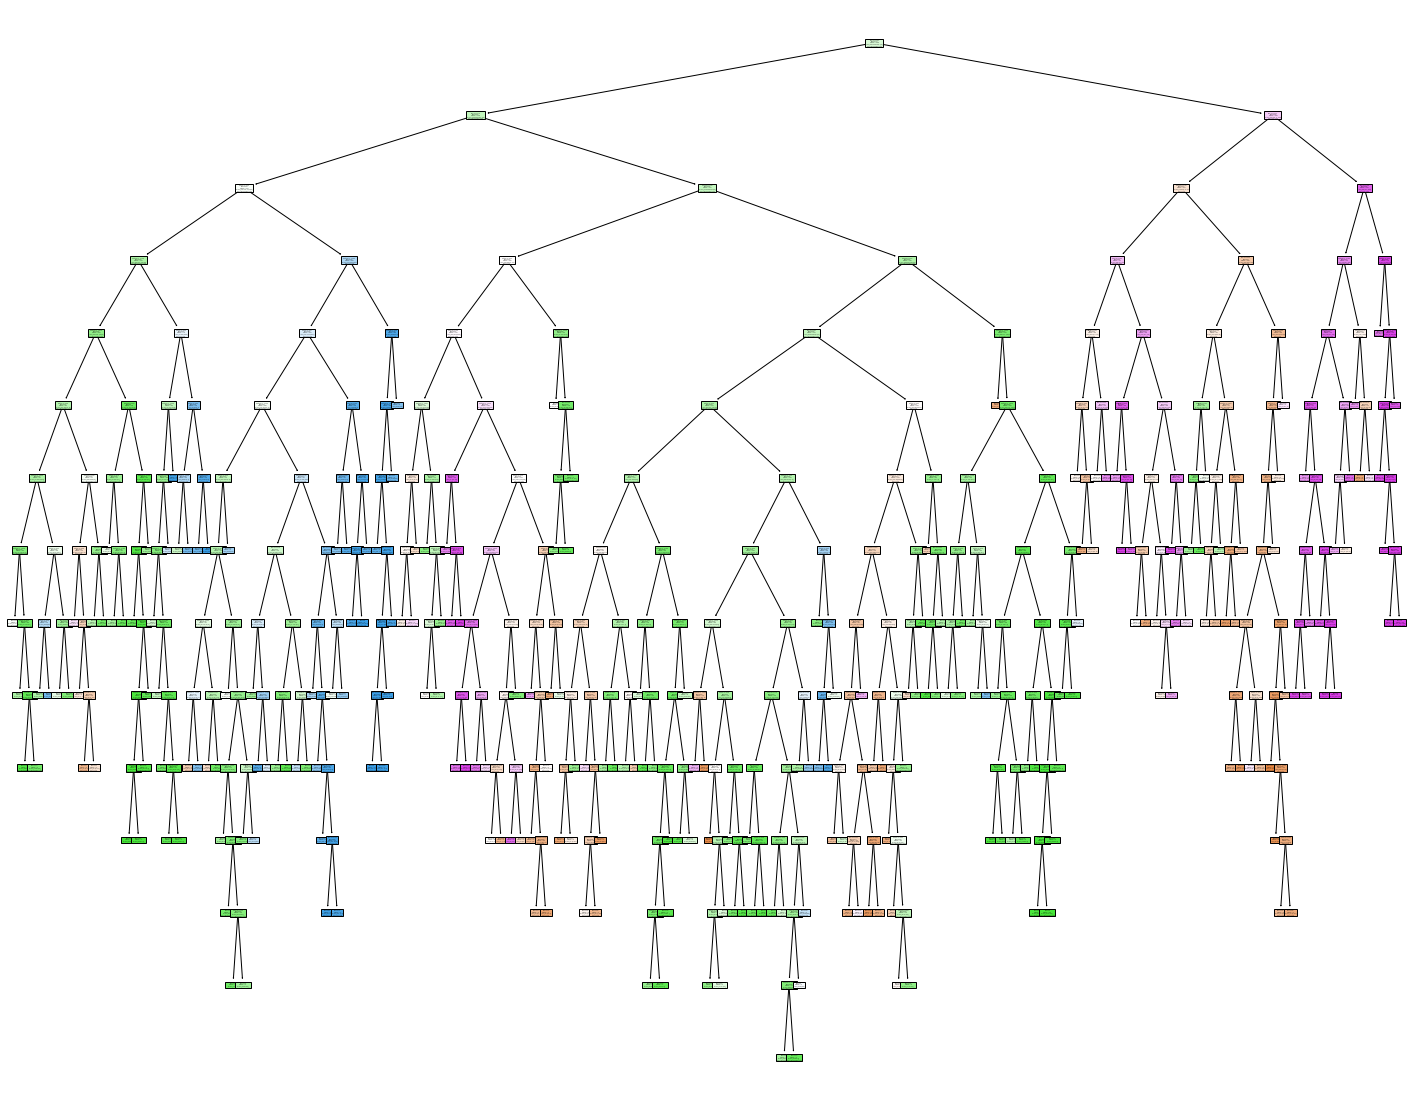

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=X.columns,  
                   class_names=label_encoder.classes_,
                   filled=True)


In [ ]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_0 <= 4.90
|   |--- feature_0 <= 2.77
|   |   |--- feature_6 <= 34.48
|   |   |   |--- feature_7 <= -117.38
|   |   |   |   |--- feature_7 <= -118.23
|   |   |   |   |   |--- feature_6 <= 34.05
|   |   |   |   |   |   |--- feature_7 <= -118.28
|   |   |   |   |   |   |   |--- feature_7 <= -118.35
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_7 >  -118.35
|   |   |   |   |   |   |   |   |--- feature_6 <= 33.95
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_6 >  33.95
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 4.66
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_2 >  4.66
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_7 >  -118.28
|   |   |   |   |   |   |   |--- feature_6 <= 33.97
|   |   |   |   |   |   |   |   |--- feature_6 <= 33.91
|   |   |   |   |   |   |   |   |   |--- cla

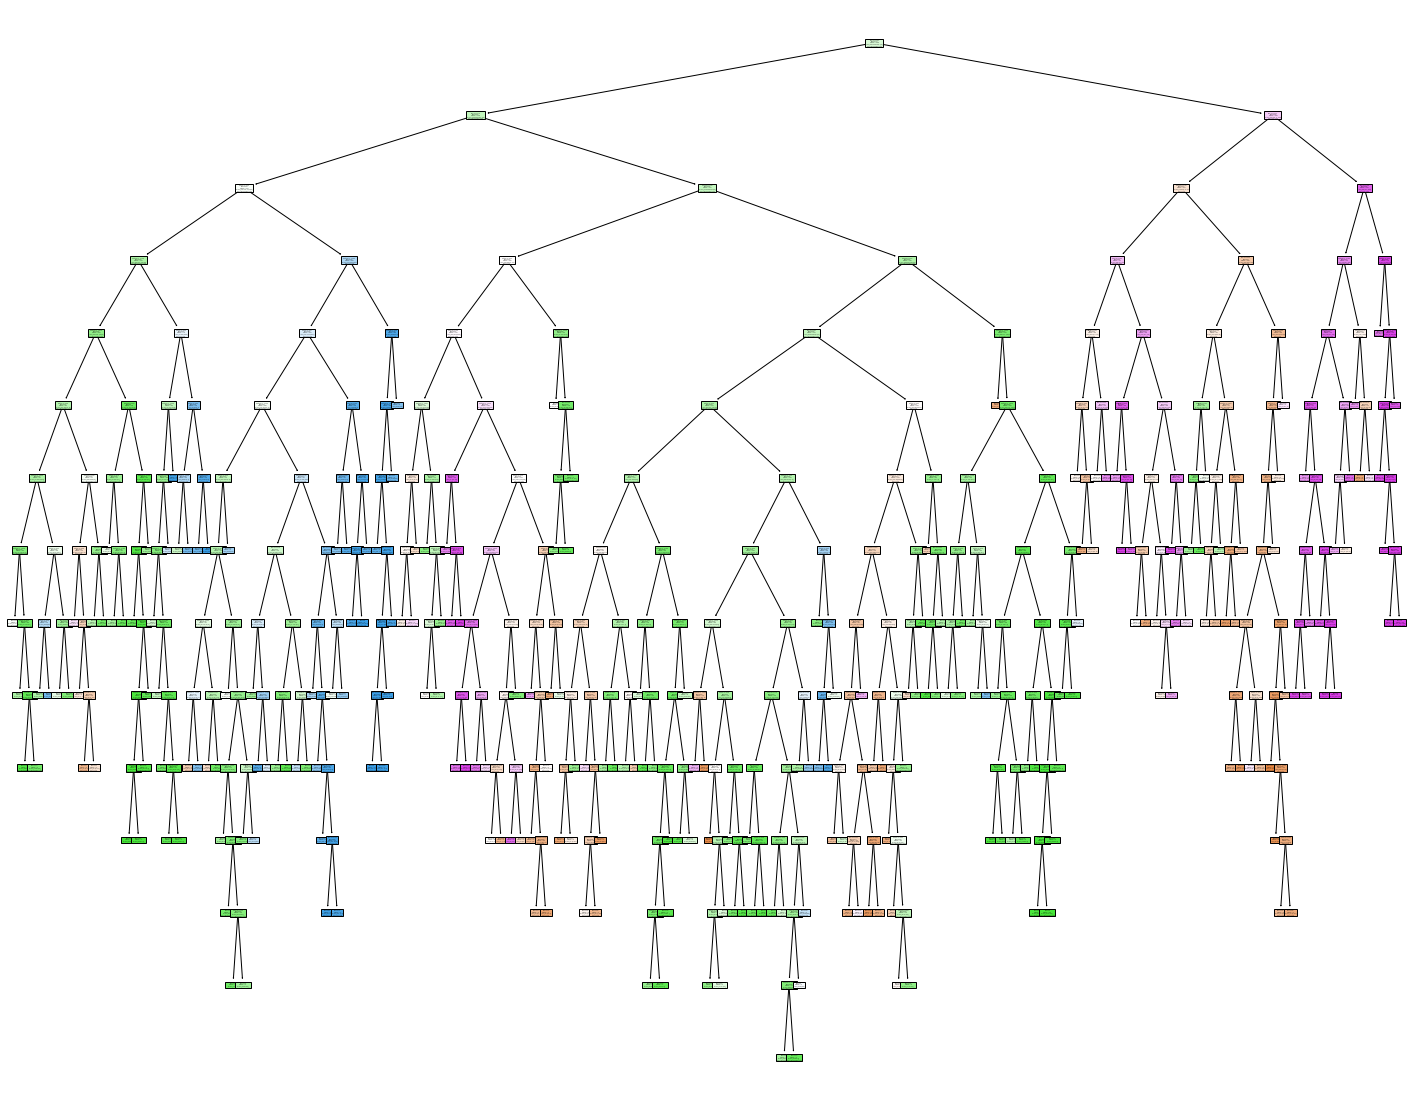

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=X.columns,  
                   class_names=label_encoder.classes_,
                   filled=True)


In [ ]:
# Evaluation of the model
print("Train Score : {}".format(classifier.score(X_train, y_train)))
print('Test Score : {}'.format(classifier.score(X_test, y_test)))

Train Score : 0.7263808139534884
Test Score : 0.687015503875969


---> We are in a very classical case of overfitting with decision trees

## comment: 
A decision tree is built on an entire dataset, 
using all the features/variables of interest, 
whereas a random forest randomly selects observations/rows 
and specific features/variables to build multiple decision trees 
from and then averages the results. After a large number of trees 
are built using this method, each tree "votes" or chooses the class, 
and the class receiving the most votes by a simple majority is the "winner" 
or predicted class. There are of course some more detailed differences, but this is the main conceptual difference.

## Modeling with a random forest.

In [ ]:
# Model with a random forest 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
print("Train Score : {}".format(classifier.score(X_train, y_train)))
print('Test Score : {}'.format(classifier.score(X_test, y_test)))

Train Score : 1.0
Test Score : 0.7618701550387597


--> We overfit too much !

In [ ]:
# Let's try to put more trees 

classifier = RandomForestClassifier(n_estimators = 150, min_samples_split=30)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=30, n_estimators=150)

In [ ]:
print("Train Score : {}".format(classifier.score(X_train, y_train)))
print('Test Score : {}'.format(classifier.score(X_test, y_test)))

Train Score : 1.0
Test Score : 0.7621124031007752


> --> We overfit too much !

## Evaluation of the quality of the model.

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, classifier.predict(X_test))

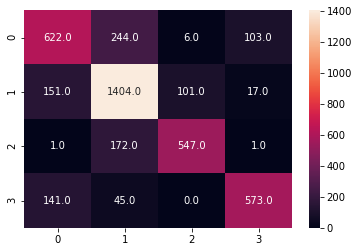

In [ ]:
# Visualization of the confusion matrix
import seaborn as sns

sns.heatmap(cm, annot=True, fmt=".1f")

In [ ]:
classifier.feature_importances_

array([0.22124037, 0.07366425, 0.10670453, 0.07403919, 0.07429971,
       0.12647801, 0.15576229, 0.16781165])

In [ ]:
dataset.columns[:-1]

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
# Feature importance 
feature_importance = pd.DataFrame({"Features":dataset.columns[:-1],
                                    "Value": classifier.feature_importances_})

feature_importance.sort_values(["Value"], ascending=False)

,Features,Value
0,MedInc,0.221240
7,Longitude,0.167812
6,Latitude,0.155762
5,AveOccup,0.126478
2,AveRooms,0.106705
4,Population,0.074300
3,AveBedrms,0.074039
1,HouseAge,0.073664
